#  K-Nearest-Neighbors (KNN) appliqués au jeu de données Bank Marketing

L’algorithme **KNN (K-Nearest Neighbors)** est une méthode **d’apprentissage supervisé**. Il est utilisé généralement pour résoudre des problèmes de classification. 

Son principe est très simple : Pour prédire la classe d'appartenance (Y = 0 ou Y= 1 pour un problème binaire) d'un nouvel individu, il suffit de rechercher les K voisins les plus proches, au sens d'une certaine **distance** (euclidienne par ex) et de lui affecter la classe de la majorité des K voisins (on parle de **vote majoritaire**).

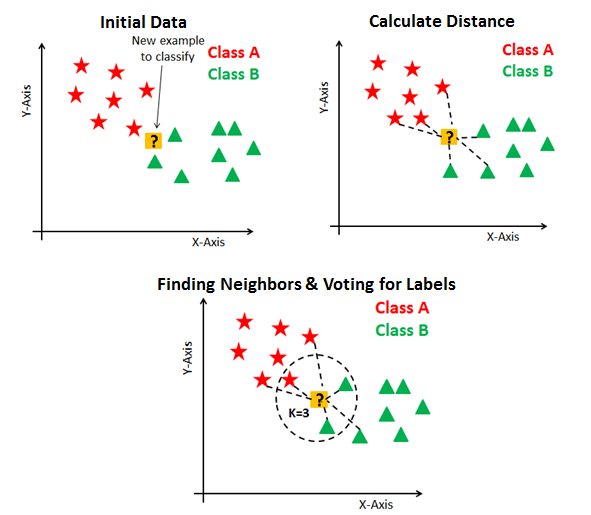

L'hyperparamètre K est déterminé à l'aide de la **Cross-Validation (CV)**. On parcourt plusieurs valeurs de K (**GridSearch**) et on choisit celle dont l'erreur CV est la plus petite.

Une petite démo du fonctionnement des KNN est disponible ici : http://vision.stanford.edu/teaching/cs231n-demos/knn/

Nous allons appliquer les KNN à un jeu de données Bank Marketing. On cherche à prédire si un client va souscrire ou non un dépôt à terme (variable cible binaire y) en fonction de ses caractéristiques.

Les données disponibles sont les suivantes :

#### bank client data:
1. age
2. job 
3. marital : marital status 
4. education 
5. default: has credit in default? 
6. housing: has housing loan? 
7. loan: has personal loan? 
#### related with the last contact of the current campaign:
8. contact: contact communication type 
9. month: last contact month of year 
10. day_of_week: last contact day of the week 
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target 
#### other attributes
12. campaign: number of contacts performed during this campaign and for this client 
13. pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. previous: number of contacts performed before this campaign and for this client 
15. poutcome: outcome of the previous marketing campaign 
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator
17. cons.price.idx: consumer price index - monthly indicator 
18. cons.conf.idx: consumer confidence index - monthly indicator 
19. euribor3m: euribor 3 month rate - daily indicator 
20. nr.employed: number of employees - quarterly indicator 

#### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

### 1. Chargement des librairies utiles

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### 1. Description du jeu de données

1. Charger le jeu de données et afficher ses dimensions
2. Afficher les 10 premières lignes de la table
3. Afficher la liste des variables et leurs types
4. Afficher les statistiques descriptives 
5. Afficher les fréquences de la variable cible **y**

In [6]:
Bank = pd.read_csv('bank-additional-full.csv', sep = ";")
Bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
Bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
Bank.shape

(41188, 21)

In [13]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
Bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
Bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
Bank.y.value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [19]:
Bank.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

 ### 2. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable

In [16]:
Bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
pourcentate1=100*Bank.isnull().sum()/len(Bank.isnull().sum())
print(pourcentate1)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [24]:
p1=100*Bank.age.isnull().sum()/len(Bank.age)
p1

0.0

 ### 3. Analyse exploratoire rapide
 1. Afficher les `cartplot`des variables `housing`, `loan`
 2. Afficher le `cartplot`de la variable `default`en fonction de la variable cible `y`
 3. Afficher les Boxplot des variables `age` et `campaign` en fonction de la variable cible `y`
 
 **Bonus** : Afficher le `pairplot` des variables ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"]


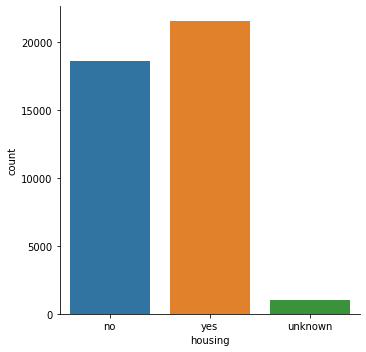

In [21]:
sns.catplot('housing',kind='count',data= Bank)
plt.show()

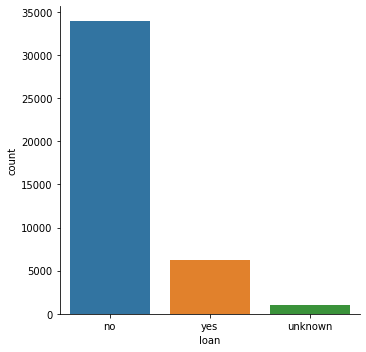

In [22]:
sns.catplot('loan',kind='count',data= Bank)
plt.show()

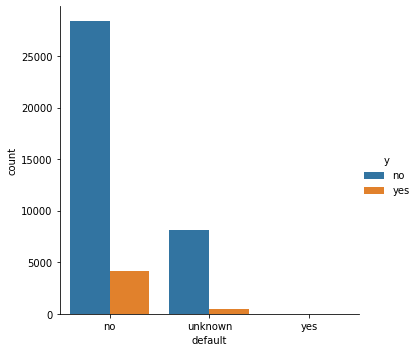

In [23]:
sns.catplot('default',kind='count',hue='y',data= Bank)
plt.show()

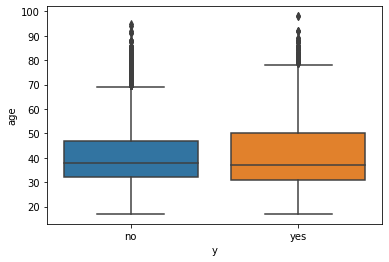

In [25]:
sns.boxplot(x=Bank["y"], y=Bank["age"] )
plt.show()

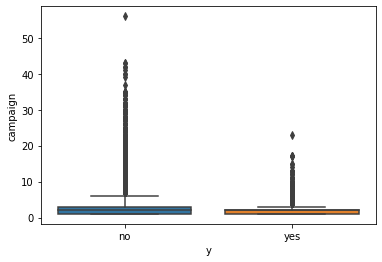

In [26]:
sns.boxplot(x=Bank["y"], y=Bank["campaign"] )
plt.show()

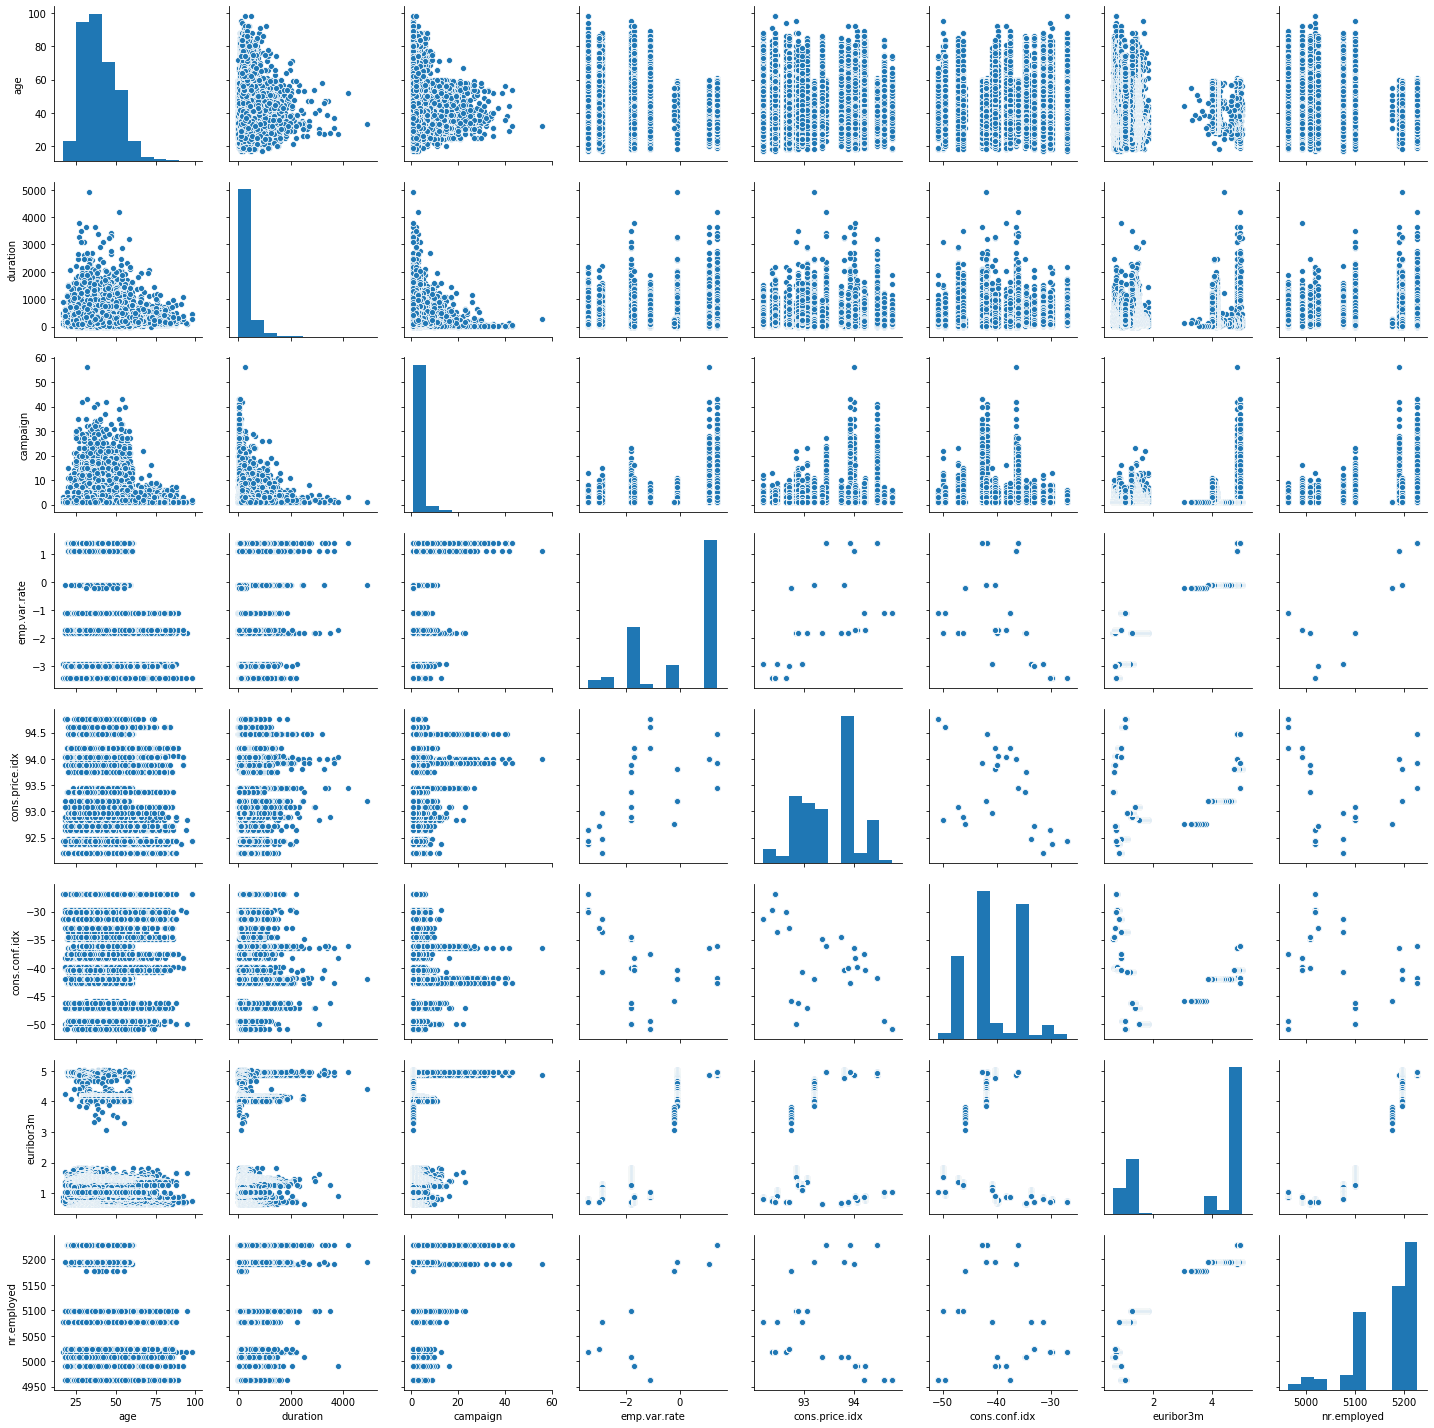

In [28]:
sns.pairplot(Bank, vars= ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"])
plt.show()

 ### 4. Data Preprocessing
1. Créer un DataFrame `X` contenant les features et `y` la Target
2. Encoder les variables catégorielles (création de dummies à l'aide de la fonction `get_dummies()`)
3. Standardiser les variables quantitatives (avec la fonction `preprocessing.scale`)

**Astuce** : Pour éviter de **répéter plusieurs fois les mêmes opérations**, 
1. Créer une boucle qui parcourt l'ensemble des colonnes du DataFrame puis teste si la variable est de type object ou autre
2. Appliquer les traitements adéquats selon le type (encodage ou standardisation).
3. Pour les variables catégorielles, supprimer celles sans encodage

In [29]:
X = pd.DataFrame(Bank, columns = ["age", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m", "nr.employed"])
X

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...
41183,73,334,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,-1.1,94.767,-50.8,1.028,4963.6


In [64]:
#autre méthode
X=Bank.drop('y',axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [65]:
Y = pd.DataFrame(Bank, columns = ["y"])
Y

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [66]:
D = pd.get_dummies(Bank, columns = ["job", "marital","education","default","housing","loan","contact","month","day_of_week","poutcome"])
D

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [67]:
Dbank = Bank[['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
                     'cons.conf.idx', 'euribor3m', 'nr.employed']]

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Dbank = sc.fit_transform(Dbank)
Dbank

array([[ 1.53303429,  0.01047142, -0.56592197, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323, -0.42150051, -0.56592197, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564, -0.12451981, -0.56592197, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  0.70856893, -0.56592197, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [70]:
# autre méthode
Xo = X.select_dtypes(include=object)
Xo = pd.get_dummies(Xo)
yo = pd.get_dummies(Y)
#3
Xn = X.select_dtypes(exclude=object)
Xn = pd.DataFrame(preprocessing.scale(Xn))
X = pd.concat([Xo,yo],axis=1)
X

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
41184,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
41185,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


### 5. Data splitting
1. Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.33 et random_state à 42 et stratify = y 

2. Àfficher le tableau de fréquence de la variable `y` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state= 42, stratify = Y)


In [48]:
Y1 = pd.DataFrame(Y.y.value_counts())
Y1

,y
no,36548
yes,4640


In [46]:
Y2 = pd.DataFrame(Y.y.value_counts(normalize=True)*100)
Y2


,y
no,88.734583
yes,11.265417


In [53]:
y1 = pd.DataFrame(y_train.y.value_counts())
y1

,y
no,24486
yes,3109


In [54]:
y2 = pd.DataFrame(y_test.y.value_counts())
y2

,y
no,12062
yes,1531


In [55]:
y3 = pd.DataFrame(y_train.y.value_counts(normalize=True)*100)
y3

,y
no,88.733466
yes,11.266534


In [56]:
y4 = pd.DataFrame(y_test.y.value_counts(normalize=True)*100)
y4

,y
no,88.73685
yes,11.26315


 ### 6. Modélisation et Performances
Nous allons à cette stade entraîner un premier **modèle KNN** en utilisant la fonction `sklearn.neighbors.KNeighborsClassifier`

1. Afficher la DocString de cette fonction
2. On choisit K = 3. 
3. Instancier un KNeighborsClassifier (n_neighbors=3) et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

In [93]:
from sklearn.neighbors import KNeighborsClassifier
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [102]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
Kb = neigh.fit(X_train, y_train)
print(neigh.classes_,'\n', neigh.effective_metric_,neigh.effective_metric_params_,neigh.outputs_2d_)

['no' 'yes'] 
 euclidean {} False


C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test.
5. Afficher l'Accuracy sur l'échantillon Test (`sklearn.metrics.accuracy_score`). Commenter

In [103]:
Ypred = Kb.predict(X_test)
Ypred

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [104]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,Ypred)


0.8965644081512544

 ### 7. Amélioration du modèle (choix optimal de l'hyperparamètre K)

1. Charger la fonction `sklearn.model_selection.GridSearchCV` 

**Principe de la GridSearch** : On indique les hyperparamètres à faire varier, scikit-learn les croise et mesure les performances par Cross-Validation (minimisation de l'erreur).

2. On décide de faire varier le nombre voisins (`n_neighbors`)et la metric (pour le calcul des distances) selon les valeurs suivantes :   
   - 'n_neighbors' :  [2,3,4,5,6,7,15]
   - 'metric' : ['minkowski','euclidean','manhattan']

Créer l'instance suivante :
``
gscv = GridSearchCV(
    KNeighborsClassifier(),
    grid_parameters,
    cv = 3)
 ``  
 Fitter sur la base de Training
 Afficher les hyperparamètres optimaux (avec `gscv.best_params_`) 
 
3. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test.
4. Afficher l'Accuracy sur l'échantillon Test (`sklearn.metrics.accuracy_score`). Comparer au résultat de la question 6.5

**BONUS - Comparaison de modèles** : Entrainer un modèle Logistique sur ce dataset. Calculer les métriques de performance et comparer l'Accurate avec celui du modèle KNN


In [94]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs', error_score='raise-deprecating', return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |     

In [86]:
grid_parameters = {
    'n_neighbors' : [2,3,4,5,6,7,15],
    'metric' : ['minkowski','euclidean','manhattan']
}

gscv = GridSearchCV(
    KNeighborsClassifier(),
    grid_parameters,
    cv = 3)

Y7 = gscv.fit(X_train, y_train)
print(Y7)


C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [89]:
print(gscv.best_params_)

{'metric': 'minkowski', 'n_neighbors': 15}


In [90]:
Ypred2 = Y7.predict(X_test)
Ypred2

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,Ypred2)

0.9076730670197896

In [98]:
X_train.shape

(27595, 8)

In [99]:
# autre tentative
grid_parameters = {
    'n_neighbors' : [2,3,4,5,6,7,15],
    'metric' : ['minkowski','euclidean','manhattan']
}

gscv = GridSearchCV(
    KNeighborsClassifier(),
    grid_parameters,
    cv = 3)

gscv.fit(X_train, y_train)



C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
print(gscv.best_params_)

{'metric': 'minkowski', 'n_neighbors': 15}


In [101]:
Ypred3 = gscv.fit(X_train, y_train).predict(X_test)
Ypred3

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: Data

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [111]:
# exo 6 avec 15 voisins
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
Kb = neigh.fit(X_train, y_train)

print(neigh.classes_,'\n', neigh.effective_metric_,neigh.effective_metric_params_,neigh.outputs_2d_)


['no' 'yes'] 
 euclidean {} False


C:\Users\Administrateur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
Y1pred = Kb.predict(X_test)
Y1pred

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [108]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,Y1pred)

0.9076730670197896